In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse


In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
PATH='drive/MyDrive/enpm808w-datasets/housing_prices/'

Mounted at /content/drive/


In [3]:
train_df =pd.read_csv(PATH + 'house_train.csv')
test_df=pd.read_csv(PATH + 'house_test.csv')
train_df.head()

,id,zip,state,county,poverty,price2007,price2013
0,0,10467,NY,bronx,27.1,335200,294000
1,1,11226,NY,kings,21.9,471500,471600
2,2,60640,IL,cook,14.6,254600,174200
3,3,94109,CA,san francisco,10.6,707100,822600
4,4,11375,NY,queens,12.2,636400,681500


In [4]:
# train_df['state'].unique()
# sns.pairplot(train_df)

In [5]:
test_df.head()

,id,zip,state,county,poverty,price2007
0,6,32162,FL,marion,13.0,265600
1,13,78572,TX,hidalgo,34.0,79900
2,20,11212,NY,kings,21.9,332000
3,30,37042,TN,montgomery,12.7,98700
4,37,85032,AZ,maricopa,12.9,266100


In [6]:
train_df.shape

# train_df.shape

(8973, 7)

In [7]:
test_df.shape

(1063, 6)

In [8]:
for tt in [train_df, test_df]:
  (tt.info())
# train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         8973 non-null   int64  
 1   zip        8973 non-null   int64  
 2   state      8973 non-null   object 
 3   county     8973 non-null   object 
 4   poverty    8973 non-null   float64
 5   price2007  8973 non-null   int64  
 6   price2013  8973 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 490.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1063 non-null   int64  
 1   zip        1063 non-null   int64  
 2   state      1063 non-null   object 
 3   county     1063 non-null   object 
 4   poverty    1063 non-null   float64
 5   price2007  1063 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memo

no null values present

getting all statistical data

In [9]:
train_df.describe() 

,id,zip,poverty,price2007,price2013
count,8973.000000,8973.000000,8973.000000,8.973000e+03,8.973000e+03
mean,5016.424830,45752.551098,11.438504,2.880939e+05,2.424867e+05
std,2900.023449,31306.650907,4.520784,2.276980e+05,2.176485e+05
min,0.000000,1001.000000,-1.000000,3.400000e+04,3.520000e+04
25%,2505.000000,19026.000000,8.400000,1.397000e+05,1.223000e+05
50%,5023.000000,37324.000000,11.100000,2.230000e+05,1.788000e+05
75%,7528.000000,76085.000000,14.500000,3.627000e+05,2.848000e+05
max,10035.000000,99709.000000,34.000000,3.467800e+06,4.709500e+06


In [10]:
test_df.describe()

,id,zip,poverty,price2007
count,1063.000000,1063.000000,1063.000000,1.063000e+03
mean,5026.575729,45231.877705,11.204798,2.907117e+05
std,2875.433022,31880.881738,4.388406,2.308495e+05
min,6.000000,1002.000000,-1.000000,4.020000e+04
25%,2544.500000,18097.000000,8.300000,1.426500e+05
50%,4953.000000,36582.000000,11.000000,2.302000e+05
75%,7516.500000,75907.000000,14.200000,3.675000e+05
max,10029.000000,99712.000000,34.000000,2.569700e+06


Text(0, 0.5, 'Count')

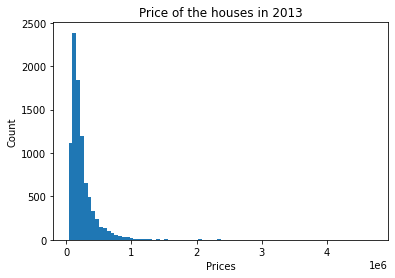

In [11]:
plt.hist(train_df['price2013'], bins=80)
plt.title('Price of the houses in 2013')
plt.xlabel('Prices')
plt.ylabel('Count')

** **bold text**Task 2:**

To divide data into independent variable and dependent variable since we are using only state information only: state information would include the zip code only for each state since the state column is a string
  x = zip, y = price2013

In [12]:
x = train_df.drop(['id','zip','county','poverty','price2007','price2013'],axis=1)
x=pd.get_dummies(data=x, drop_first=True)

y = train_df['price2013']


**i used the get_dummies function to encode the categorical feature by assigning the state column per each state category**

In [13]:
print(x.shape)
print(y.shape)
x

(8973, 45)
(8973,)


,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,state_RI,state_SC,state_TN,state_TX,state_UT,state_VA,state_WA,state_WI,state_WV,state_WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8969,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80, test_size=0.2, random_state=100)
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# sns.scatterplot(x='state', y='price2013')


(6281, 45)
(2692, 45)
(6281,)
(2692,)


**Using the train_test_split function allows me to split the training data into two data sets  a training and test set. this also allows me to compare with other test data given**

In [15]:
x_train=sm.add_constant(x_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
# state_lr=LinearRegression(fit_intercept=True)
# state_info_lr = state_lr.fit(x_train,y_train) 
state_lr=sm.OLS(y_train,x_train).fit()

In [17]:
print(state_lr.summary())

                            OLS Regression Results                            
Dep. Variable:              price2013   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     58.89
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:25:43   Log-Likelihood:                -84949.
No. Observations:                6281   AIC:                         1.700e+05
Df Residuals:                    6235   BIC:                         1.703e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.889e+05   4.54e+04      6.365      0.0

**Task 2A**
What is the intercept? What does it correspond to? 


In [18]:
# lr.intercept_
print('the Intercept is', state_lr.intercept_)

AttributeError: ignored

**The intercept corresponds to the overall mean value in relation to the state values being equal to zero**

In [ ]:
# lr.coef_
print('the state coefficients are \n', state_lr.coef_)


the state coefficients are 
 [-133759.12518854 -151622.99465241  -66113.90374332  238161.70311056
  -23913.43080585   11488.59881031  267025.49019608  -76105.88235294
  -96546.43962848 -122964.1064069   215771.64404223 -119598.09954751
  -95899.20566767 -142817.36694678 -133374.50980392 -123852.04603581
 -121526.8907563    65656.38450502   10547.9638009  -126426.56459844
  -67664.95269437 -117395.6407563   -46409.92647059 -119076.40374332
 -116374.50980393 -129609.92647059  -71769.74789916   41177.9144385
  -89912.60504202  -46419.22525108   26518.3217373  -157609.92647059
 -162327.91116447  -57625.5048288  -106412.23529412  -38652.80437757
 -123246.12696564 -143145.86397059 -113838.48588763  -30247.84313726
   22643.67201426   -2942.11543772 -107225.35368578 -182277.54010695
  -78761.17647059]


**Task 2B**
How do you get this information from your regression?

**Using the Formula for Linear Regression**
**Y=B0+B1X1**

where Y is the prediction/dependent variable 
B0 is the y-intercept, 
B1 is the coefficient/slope
X1 is the independent variable

In [ ]:
coeff_df = pd.DataFrame(state_lr.coef_,x_train.columns,columns=['Coefficients'])
coeff_df['states']=x_train.columns.str.replace('state_','')
coeff_df


,Coefficients,states
state_AL,-133759.125189,AL
state_AR,-151622.994652,AR
state_AZ,-66113.903743,AZ
state_CA,238161.703111,CA
state_CO,-23913.430806,CO
state_CT,11488.598810,CT
state_DC,267025.490196,DC
state_DE,-76105.882353,DE
state_FL,-96546.439628,FL
state_GA,-122964.106407,GA


**Task 2C**
Based on your regression coefficients, what states have the most and least 
expensive average homes?

In [ ]:
# coeff_df.sort_values(by='Coefficients',ascending=False)
print('the state that have the most expensive average homes', coeff_df.max())
print('the state that have the least expensive average homes', coeff_df.min())


the state that have the most expensive average homes Coefficients    267025.490196
states                     WY
dtype: object
the state that have the least expensive average homes Coefficients   -182277.540107
states                     AL
dtype: object


**states WY ** **bold text** has the most expensive homes while **states AL** is the least expennsive homes

In [ ]:
coeff_df.value_counts()

Coefficients    states
-182277.540107  WV        1
-89912.605042   NM        1
-76105.882353   DE        1
-71769.747899   NH        1
-67664.952694   MN        1
-66113.903743   AZ        1
-57625.504829   OR        1
-46419.225251   NV        1
-46409.926471   MT        1
-38652.804378   RI        1
-30247.843137   UT        1
-23913.430806   CO        1
-2942.115438    WA        1
 10547.963801   MD        1
 11488.598810   CT        1
 22643.672014   VA        1
 26518.321737   NY        1
 41177.914439   NJ        1
 65656.384505   MA        1
 215771.644042  HI        1
 238161.703111  CA        1
-78761.176471   WY        1
-95899.205668   IL        1
-162327.911164  OK        1
-96546.439628   FL        1
-157609.926471  OH        1
-151622.994652  AR        1
-143145.863971  TN        1
-142817.366947  IN        1
-133759.125189  AL        1
-133374.509804  KS        1
-129609.926471  NE        1
-126426.564598  MI        1
-123852.046036  KY        1
-123246.126966  SC       

In [ ]:
# x = [1, 2, 3, 4, 5, 6, 7]
# regression_line =[state_lr.coef_*x + state_lr.intercept_ for x in x ]
# regression_line
# plt.plot(x,regression_line)
# plt.show()

In [ ]:
# train_df.mean()
# plt.figure(figsize=(12,6))
# sns.scatterplot(x='state', y=train_df['price2013'].mean(), data=train_df)
# price_mean= train_df['price2013'].mean()
print(train_df['price2013'].value_counts())


125300    12
118100    12
111500    10
114900    10
132800    10
          ..
516600     1
607500     1
50800      1
460200     1
181700     1
Name: price2013, Length: 3924, dtype: int64


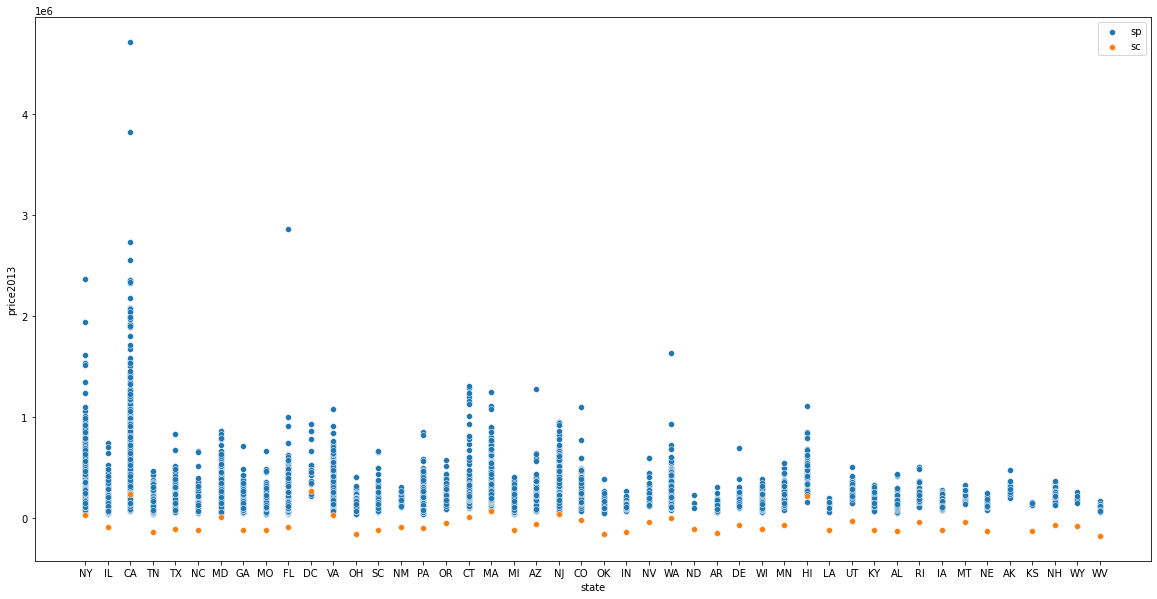

In [ ]:
# plt.figure(figsize=(16,10))
# sns.scatterplot(x=train_df['zip'], y=train_df['price2013'])
# sns.barplot(x=x,y='price2013', hue='lr')
# ax=train_df.plot(x='state', y='price2013')
# coeff_df.plot(ax=ax, x='states', y='Coefficients')
# df = pd.concat([train_df,coeff_df]).reset_index(drop=True)
# sns.relplot(data=df, x='price2013',y='Coefficients', hue='states')
fig, ax=plt.subplots(figsize=(20,10))
sns.scatterplot(data=train_df, x='state',y='price2013',label='sp',ax=ax)
sns.scatterplot(data=coeff_df, x='states',y='Coefficients',label='sc',ax=ax)

In [ ]:
s_pred_train = state_lr.predict(x_train)
s_pred_train


array([150277.07006369, 511402.87958115, 226821.95121951, ...,
       283789.14027149, 511402.87958115, 207127.27272727])

In [ ]:
s_pred_test = state_lr.predict(x_test)
s_pred_test

array([166828.94117647, 150277.07006369, 270299.06103286, ...,
       115631.25      , 295884.84848485, 299759.49820789])

In [ ]:
state_lr.score(x_train,y_train)


0.2871875350224815

In [ ]:
print('RMSE Score is :', rmse(y_test,s_pred_test))

RMSE Score is : 188074.84947055747


In [ ]:
df_pred_s=pd.DataFrame(s_pred_train, columns=['State Predictions'])
df_pred_s

,State Predictions
0,150277.070064
1,511402.879581
2,226821.951220
3,154164.772727
4,489012.820513
...,...
7173,314419.090909
7174,150277.070064
7175,283789.140271
7176,511402.879581


**Task 2D**
How do you get this information from your regression?

***by checking for the maximum and minimum values of the regression coefficients ***

**Task 2E**
 What is the average price of homes in those states?

In [ ]:
# avg_price = lr.coef_+lr.intercept_
avg_price_df= pd.DataFrame(state_lr.coef_+state_lr.intercept_,x_train.columns,columns=['Average Price of Homes'])\
.sort_values(by='Average Price of Homes', ascending=False)
avg_price_df

,Average Price of Homes
state_DC,540266.666667
state_CA,511402.879581
state_HI,489012.820513
state_MA,338897.560976
state_NJ,314419.090909
state_NY,299759.498208
state_VA,295884.848485
state_CT,284729.775281
state_MD,283789.140271
state_WA,270299.061033


**Task 2F**

How do you get this information from your regression?

**the coefficients and the intercept define the linear relationship between the two variables and can be estimated as an averate rate of change. so the greater the coefficient, the higher the rate of change. As the average price for each state increases, so does the price of each state**

**Task 3**

Predict 2013 home prices from state and county information.
 
**A.** What US counties have the highest and lowest regression coefficients? 
Why?




In [ ]:
X = train_df.drop(['id','zip','poverty','price2007','price2013'],axis=1)
X=pd.get_dummies(data=X, drop_first=True)

y = train_df['price2013']

In [ ]:
print(X.shape)
print(y.shape)
X

(8973, 672)
(8973,)


,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,...,county_yadkin,county_yakima,county_yamhill,county_yates,county_yavapai,county_yellowstone,county_yolo,county_york,county_yuba,county_yuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8969,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80, test_size=0.2, random_state=100)
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7178, 672)
(1795, 672)
(7178,)
(1795,)


In [ ]:
sc_lr=LinearRegression()
state_cty_info_lr=sc_lr.fit(X_train,y_train)

In [ ]:
# sc_lr.coef_
print('State and County coefficients are \n', sc_lr.coef_)

State and County coefficients are 
 [ 9.59237892e+17  9.59237892e+17  9.59237892e+17  9.59237892e+17
  9.59237892e+17  9.59237892e+17  1.76812535e+17  9.59237892e+17
  9.59237892e+17  9.59237892e+17  8.18439592e+17  9.59237892e+17
  9.59237892e+17  9.59237892e+17  9.59237892e+17  9.59237892e+17
  6.10944368e+17  9.59237892e+17  9.59237892e+17  9.59237892e+17
  9.59237892e+17  9.59237892e+17 -9.72755313e+17  9.59237892e+17
  3.70868301e+17  9.59237892e+17  9.59237892e+17  9.59237892e+17
  1.02327011e+18  9.59237892e+17  9.59237892e+17  9.59237892e+17
  9.59237892e+17  9.59237892e+17  9.59237892e+17  9.59237892e+17
  9.59237892e+17  9.59237892e+17  9.59237892e+17  9.59237892e+17
  9.59237892e+17  9.59237892e+17  9.59237892e+17  9.59237892e+17
 -5.42219244e+16  4.49920000e+04  4.44760000e+04  5.88960000e+04
  1.02504000e+05  3.86440000e+04  1.20804000e+05  3.30416000e+05
  2.72640000e+04 -1.80240000e+05  1.04800000e+04  4.04880000e+04
 -2.71784000e+05  9.59237892e+17  4.00080000e+04  1.02

In [ ]:
county_coeff_df = pd.DataFrame(sc_lr.coef_,X_train.columns,columns=['Coefficients'])
# df=pd.concat([coeff_df,county_coeff_df],axis=1)
# df=coeff_df.append(county_coeff_df)
county_coeff_df['states']=X_train.columns.str.replace('state_','')
county_coeff_df['Counties']=X_train.columns.str.replace('county_','')
# county_coeff_df
county_coeff_df
# df.describe()
# df


,Coefficients,states,Counties
state_AL,9.592379e+17,AL,state_AL
state_AR,9.592379e+17,AR,state_AR
state_AZ,9.592379e+17,AZ,state_AZ
state_CA,9.592379e+17,CA,state_CA
state_CO,9.592379e+17,CO,state_CO
...,...,...,...
county_yellowstone,1.931993e+18,county_yellowstone,yellowstone
county_yolo,-1.753100e+05,county_yolo,yolo
county_york,5.723200e+04,county_york,york
county_yuba,-2.962180e+05,county_yuba,yuba


In [ ]:
print('the state that have the most expensive average homes', county_coeff_df.max())
print('the state that have the least expensive average homes', county_coeff_df.min())

the state that have the most expensive average homes Coefficients    1965247663612905984.0
states                    county_yuma
Counties                         yuma
dtype: object
the state that have the least expensive average homes Coefficients   -1202518866027531520.0
states                             AL
Counties                        aiken
dtype: object


In [ ]:
sc_pred=sc_lr.predict(X_train)
sc_pred  
sc_pred_df=pd.DataFrame(sc_pred, columns=['State & County Predictions'], )
sc_pred_df

,State & County Predictions
0,276864.0
1,192000.0
2,120960.0
3,170112.0
4,260480.0
...,...
7173,86784.0
7174,80512.0
7175,134784.0
7176,193152.0


In [ ]:
sc_lr.score(X_train,y_train)

0.549008098265345

In [ ]:
X_test.isnull().sum()

state_AL              0
state_AR              0
state_AZ              0
state_CA              0
state_CO              0
                     ..
county_yellowstone    0
county_yolo           0
county_york           0
county_yuba           0
county_yuma           0
Length: 672, dtype: int64

In [ ]:
sc_pred_test = sc_lr.predict(X_test)
sc_pred_test

array([387328.,  99072., 116864., ..., 121856., 220032.,  93568.])

In [ ]:
print('RMSE Score:')
print(rmse(y_test,sc_pred_test))


RMSE Score:
5.825605064098801e+16


In [ ]:
sc_s_pred=pd.concat([df_pred_s,sc_pred_df],axis=1)
sc_s_pred

,State Predictions,State & County Predictions
0,150277.070064,276864.0
1,511402.879581,192000.0
2,226821.951220,120960.0
3,154164.772727,170112.0
4,489012.820513,260480.0
...,...,...
7173,314419.090909,86784.0
7174,150277.070064,80512.0
7175,283789.140271,134784.0
7176,511402.879581,193152.0


**TASK 4**

**XGBoost XGBRegressor is a powerful algorithm and an approach which is mostly for building regression models of which was used here. this allows me to determine the RSME value in comparison with actual values and the predicted values**

In [ ]:

from xgboost import XGBRegressor
model= XGBRegressor(n_estimators=350, max_depth=15,learning_rate=.1,random_state=1,\
                    n_jobs=10,subsample=1,min_child_weight=0.6)
model.fit(X_train,y_train)
preds_test=model.predict(X_test)

[03:08:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# preds_test
print('RMSE Score:')
print(rmse(y_test,preds_test))

RMSE Score:
133427.72057427227


In [ ]:
test_df1 = pd.get_dummies(test_df)
X_train, X_test = X_train.align(test_df1, join='left', axis=1)
test_df1.head()

,id,zip,poverty,price2007,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,...,county_wood,county_worcester,county_wright,county_yadkin,county_yakima,county_yamhill,county_yavapai,county_yellowstone,county_york,county_yuba
0,6,32162,13.0,265600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,78572,34.0,79900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20,11212,21.9,332000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,37042,12.7,98700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,85032,12.9,266100,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


this is where i aligned the 

In [ ]:
preds_test=model.predict(X_test)
print(len(preds_test))

1063


Text(0.5, 1.0, 'Predicted House Price')

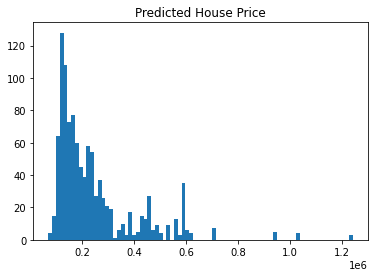

In [ ]:
plt.hist(preds_test,bins=80)
plt.title('Predicted House Price')


In [ ]:
output = pd.DataFrame({'id':test_df1.id,
                       'HousePrice': preds_test})
output.to_csv('submission.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!
